# Fitting least squares linear regression

In this notebook we explain a few more perspectives on fitting least squares linear regression.

We have already seen that the MLE fitting of a linear model is also the least squares minimizing estimate of the non-variance parameters of the model.  

We are going to focus on estimating these parameters through least squares minimization.

It turns out that all three of the following problems use exactly the same ideas, but with increasing levels of mathematical sophistication.

$$ 
\textrm{simple linear regression with no bias} \to \textrm{simple linear regression with bias} \to \textrm{multiple linear regression}
$$ 

We will show how to solve each problem using a calculus perspective and a linear algebra perspective.

* Simple linear regression with no bias
    * Calculus:  uses only single variable calculus.
    * Linear Algebra:  only uses dot product and solution of a single linear equation.
* Simple linear regression with bias
    * Calculus:  uses undergraduate level multivariable calculus.
    * Linear Algebra: uses the dot product and the solution of a system of 2 equations.
* Multiple linear regression
    * Calculus:  requires us to understand gradients in higher dimensional spaces than usual covered by undergrad multivariate calculus courses.
    * Linear Algebra:  While we could use a similar approach, it becomes convenient to package all $k+1$ of these dot products together into an adjoint operator.

Why bother using both approaches in each case?  We will see that the linear algebra is often much "tidier" than the corresponding approach using differential calculus, so you might question the choice to utilize Calculus at all.

The reason is generalization.  While linear algebra tools *are* available to us in the case of linear regression, in general they are not.  Fitting a model by specifying a loss function on the parameters of the model, and then using multivariate differential calculus to minimize the loss function (often through an iterative algorithm like gradient descent) is a much more general method.  It is at the heart of machine learning!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Projecting a vector onto a line.

All of the ideas needed to understand linear regression are already present in a very simple situation you probably first encountered in a multivariable calculus course or introduction to linear algebra course:  projecting a vector onto a line.

We want to project the vector $p$ onto the line spanned by a vector $\vec{v}$

We will call the projected point $\textrm{proj}_{\vec{v}}(p)$ and the difference $p_\perp = p - \textrm{proj}_{\vec{v}}(p)$.

![projection](images/projection1.png)

We have two distinct approaches to this problem.  One uses calculus and the other uses linear algebra.

## Calculus approach

We want to find the coordinates of the point $\textrm{proj}_{\vec{v}}(p)$.

Since it is in the span of $\vec{v}$ we know that there is a $\beta \in \mathbb{R}$ with $\textrm{proj}_{\vec{v}}(p) = \beta \vec{v}$.

Looking at the picture above, we can see that the projection is the vector of the form $\beta \vec{v}$ which is *closest* to the vector $p$.

So we want to find $\beta$ so that the length of $p - \beta \vec{v}$ is minimized.

To make things easier, we will minimize the square of the length.  I will call this function $L$ for "loss function".

$$
\begin{align*}
L(\beta) &= \left| p - \beta \vec{v}\right|^2\\
&= (p - \beta \vec{v}) \cdot (p - \beta \vec{v})\\
&= p \cdot p + \beta^2 \vec{v} \cdot \vec{v} - 2 \beta p \cdot \vec{v}\\
\end{align*}
$$

so 

$$
\begin{align*}
\frac{\textrm{d} L}{\textrm{d} \beta} &=  2 \beta \vec{v} \cdot \vec{v} - 2 p \cdot \vec{v}\\
\end{align*}
$$

so $L$ is minimized when

$$
\beta = \frac{\vec{p} \cdot \vec{v}}{\vec{v} \cdot \vec{v}}
$$

Thus 

$$\textrm{proj}_{\vec{v}}(p) = \frac{\vec{p} \cdot \vec{v}}{\vec{v} \cdot \vec{v}} \vec{v}$$


## Linear Algebra approach

Alternatively, we can use linear algebra to solve the problem.

We know that

$$
p = \textrm{proj}_{\vec{v}}(p) + p_\perp
$$

where $p_\perp$ is perpendicular to $\vec{v}$ and $\textrm{proj}_{\vec{v}}(p) = \beta \vec{v}$ is in the span of $\vec{v}$. 

So a natural thing to do is take the dot product of both sides with $\vec{v}$.

$$
\begin{align*}
p &= \textrm{proj}_{\vec{v}}(p) + p_\perp\\
p &= \beta \vec{v} + p_\perp\\
p \cdot \vec{v} &= \beta \vec{v} \cdot \vec{v} + p_\perp \cdot \vec{v}\\
p \cdot \vec{v} &= \beta \vec{v} \cdot \vec{v} + 0\\
\beta &= \frac{p \cdot \vec{v}}{\vec{v} \cdot \vec{v}}
\end{align*}
$$

So in general we have

$$
\textrm{proj}_{\vec{v}}(p) = \frac{p \cdot \vec{v}}{\vec{v} \cdot \vec{v}} \vec{v}
$$

so we have confirmed the solution obtained via Calculus.

### How is projecting a point onto a line related to simple linear regression with no bias?

It is illustrative to think about the case when we only have $3$ data point and we are trying to fit a model of the form $y = \hat{\beta} x$ with no bias term.

We will use the points $(1, 1.3), (2, 3.9), (3, 7)$.  We can pretend that the data actually obeys $y = 2x + \epsilon$ where $\epsilon$ is some normally distributed error term.  Our "true" paramter is $\beta = 2$ here.  We don't have access to this true value though:  we only have these three points and we are going to use them to get the best estimate $\hat{\beta}$ that we can.

We can think of these points geometrically in two different ways.  In the first visualization, we can see the vectors $\textcolor{red}{\vec{x}} = (1,2,3)$ and $\textcolor{red}{\vec{y}} = (1.3, 3.9, 7)$ both living in $\mathbb{R}^3$.  Then the projection $\textcolor{blue}{\textrm{proj}_{\vec{x}}(\vec{y})}$ is the vector of the form $\hat{\beta} \vec{x}$ which is geometrically closest to the vector $\vec{y}$.  As we saw above, the value of $\hat{\beta}$ is $\frac{\vec{y} \cdot \vec{x}}{\vec{x} \cdot \vec{x}} = 2.15$ in this case.

However, we can *also* think of $(1, 1.3), (2, 3.9), (3, 7)$ as just $3$ points in $\mathbb{R}^2$.  The three points $(1,2.15), (2, 2.15 \cdot 2), (3, 2.15 \cdot 3)$ all lie on the line $y = 2.15 x$.  This value of $\hat{\beta}$ has been chosen to minimize the square of the difference between the values of $y$ predicted by the model $y = \hat{\beta} x$ and the actual values $1.3, 3.9$ and $7$.

So we can re-interpret the projection of $\vec{y}$ onto the span of $\vec{x}$ as finding the "best-fit" line $y = \hat{\beta} x$ where our meaning of the word "best-fit" is "minimize sum of squared errors".

![projection vs. regression](images/proj-vs-fit.png)

# Simple Linear Regression

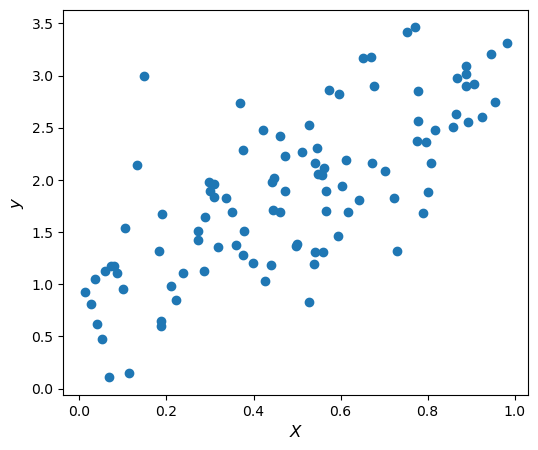

In [2]:
## Making some data
N = 100
X = np.random.random(N) # this generates a numpy array of N values chosen uniformly at random from the interval [0,1]
y = 2*X + 1 + .5*np.random.randn(N) # np.random.randn(N) is an array of N values sampled from normal distrubution of mean 0 and variance 1

plt.figure(figsize=(6,5))

plt.scatter(X, y)

plt.xlabel("$X$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

plt.show()

In simple linear regression, we still have only one feature $x$ and we are trying to regress $y$ on $x$.  The difference is that we now also have a bias term.  We are trying to find the values of $\beta_0$ and $\beta_1$ so that the mean squared error between the observed values $\vec{y}$ and the predicted values $\hat{y} = \beta_1 \vec{x} + \beta_0$ is minimized.

The plot above shows a *single sample* $(\vec{x},\vec{y})$.  The "true parameters" (which we will never have access to in a practical problem) are $\beta_0 = 1$ and $\beta_1 = 2$.  We are going to try and find fit the parameters $\hat{\beta_0}$ and $\hat{\beta_1}$ based only on this single sample.  Hopefully these estimated parameters will be close to the true parameters!

We already saw how to do this in math hour 2.  In that notebook we observed that the MLE estimate is *also* the least squares estimate.  We will see how to gain additional insight because of this. 

We can again either treat this as a multivariable Calculus problem (minimize a function of the two parameters) or as a linear algebra problem (this will end up being equivalent to projecting $\vec{y}$ onto the plane spanned by $\vec{x}$ and $\vec{1}$).

## Calculus approach

Here we have $N$ data points, and we would like to find the line $y = \hat{\beta_1} x + \hat{\beta_0}$ which "best fits" this data.  In particular, we would like to minimize the mean squared error, which I will denote $L$ for "loss function" as before.  Let $\vec{x} \in \mathbb{R}^N$ be the vector whose coordinates are the $x$-coordinates of the data points (in order), and $\vec{y}$ be  similarly defined for the $y$-coordinates. Let $\vec{1}$ denote the vector in $\mathbb{R}^N$ whose coordinates are all $1$.  Then our loss function can be written

$$
\begin{align*}
L(\hat{\beta_0}, \hat{\beta_1}) &= \frac{1}{N} \left|\vec{y} - (\hat{\beta_1} \vec{x} + \hat{\beta_0} \vec{1})\right|^2\\
&= \frac{1}{N}(\vec{y} - (\hat{\beta_1} \vec{x} + \hat{\beta_0} \vec{1})) \cdot (\vec{y} - (\hat{\beta_1} \vec{x} + \hat{\beta_0} \vec{1}))\\
&= \frac{1}{N} \left( |\vec{y}|^2 + \hat{\beta_1}^2 |\vec{x}|^2 + \hat{\beta_0}^2 |\vec{1}|^2 - 2 \hat{\beta_1} \vec{x} \cdot \vec{y} - 2\hat{\beta_0} \vec{y} \cdot \vec{1}  + 2 \hat{\beta_0}\hat{\beta_1} \vec{x} \cdot \vec{1} \right)
\end{align*}
$$

Note that  $\vec{x} \cdot \vec{1}$ is just the sum of all of the coordinates of $x$, and so $\vec{x} \cdot 1 = N \bar{x}$.  Similarly $\vec{y} \cdot \vec{1} = N \bar{y}$ and  $|\vec{1}|^2 = N$.

So we can rewrite our loss function as

$$
\begin{align*}
L(\hat{\beta_0}, \hat{\beta_1}) = \frac{1}{N} \left( |\vec{y}|^2 + \hat{\beta_1}^2 |\vec{x}|^2 + N\hat{\beta_0}^2  - 2\hat{\beta_1} \vec{x} \cdot \vec{y} - 2N\bar{y} \hat{\beta_0} + 2N\hat{\beta_0}\hat{\beta_1} \bar{x}\right)
\end{align*}
$$


We have partial derivatives

$$
\begin{align*}
\frac{\partial L}{\partial \hat{\beta_0}} &= 2\hat{\beta_0} - 2\bar{y} + 2\hat{\beta_1} \bar{x}\\
\frac{\partial L}{\partial \hat{\beta_1}} &= \frac{1}{N} \left( 2\hat{\beta_1} |\vec{x}|^2  - 2 \vec{x} \cdot \vec{y} + 2N \hat{\beta_0} \bar{x} \right)
\end{align*}
$$

Setting these equal to zero simultaneously we obtain

$$
\begin{align}
2\hat{\beta_0} - 2\bar{y} + 2\hat{\beta_1} \bar{x} &= 0\\
\frac{1}{N} \left( 2\hat{\beta_1} |\vec{x}|^2  - 2 \vec{x} \cdot \vec{y} + 2N \hat{\beta_0} \bar{x} \right)&=0
\end{align}
$$


The first equation yields $\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}$

Substituting this into the second equation yields

$$
\begin{align*}
2\hat{\beta_1} |\vec{x}|^2 - 2\vec{x} \cdot \vec{y} + 2N( \bar{y} - \hat{\beta_1} \bar{x})\bar{x} &= 0\\
(2 |\vec{x}|^2 - 2N \bar{x}^2 )\hat{\beta_1} &= 2 \vec{x} \cdot \vec{y} - 2N \bar{x}\bar{y}\\
\hat{\beta_1} = \frac{ \vec{x} \cdot \vec{y} - N \bar{x}\bar{y}}{ |\vec{x}|^2 - N \bar{x}^2}
\end{align*}
$$

Let's try plotting this best fit line to make sure we are on the right track.

In [3]:
beta_1 = (X.dot(y) - N*np.mean(X)*np.mean(y))/(X.dot(X) - N*np.mean(X)**2)
beta_0 = np.mean(y) - beta_1*np.mean(X)
y_slr = beta_1 * X + beta_0

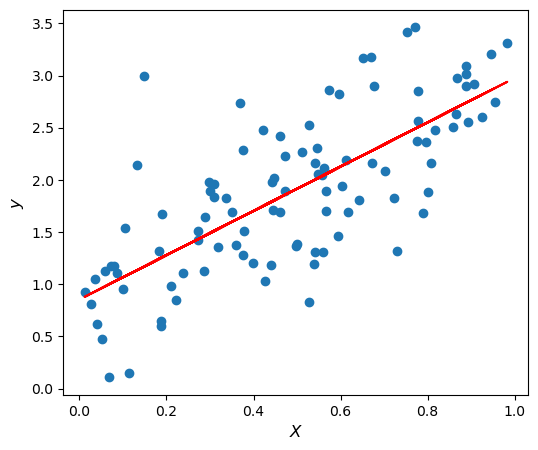

In [4]:
plt.figure(figsize=(6,5))

plt.scatter(X, y)
plt.plot(X,y_slr, color = 'red')

plt.xlabel("$X$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

plt.show()

We can also compare our results to the linear regression obtained by sklearn.

In [5]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression(copy_X = True)
slr.fit(X.reshape(-1,1), y)
print(f'Our value for beta_0 was {beta_0} while sklearn predicted {slr.intercept_}')
print(f'Our value for beta_1 was {beta_1} while sklearn predicted {slr.coef_[0]}')
print("The 'true parameters' were beta_0 = 1 and beta_1 = 2")

Our value for beta_0 was 0.854282546912545 while sklearn predicted 0.8542825469125446
Our value for beta_1 was 2.1218987703195764 while sklearn predicted 2.1218987703195773
The 'true parameters' were beta_0 = 1 and beta_1 = 2


That looks pretty good!

Usually we do a little more algebra to make these formulas prettier.

$$
\begin{align*}
(\vec{x} - \vec{1}\bar{x}) \cdot (\vec{y} - \vec{1} \bar{y}) 
&= \vec{x} \cdot \vec{y} - (\vec{x} \cdot \vec{1}) \bar{y} - (\vec{1} \cdot \vec{y}) \bar{x} + (\vec{1} \cdot \vec{1}) \bar{x} \bar{y}\\
&= \vec{x} \cdot \vec{y} - N\bar{x} \bar{y} - N\bar{x} \bar{y} + N \bar{x}\bar{y}\\
&= \vec{x} \cdot \vec{y} - N\bar{x}\bar{y}
\end{align*}
$$

$(\vec{x} - \vec{1}\bar{x}) \cdot (\vec{y} - \vec{1} \bar{y})$ could also be written $\displaystyle \sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})$, which is also known as the covariance of $x$ and $y$.

$$
\begin{align*}
\left| \vec{x} - \vec{1}\bar{x}\right|^2 
&= (\vec{x} - \vec{1}\bar{x}) \cdot (\vec{x} - \vec{1} \bar{x}) \\
&= \vec{x} \cdot \vec{x} - (\vec{x} \cdot \vec{1}) \bar{x} - (\vec{1} \cdot \vec{x}) \bar{x} + (\vec{1} \cdot \vec{1}) \bar{x} \bar{x}\\
&= \vec{x} \cdot \vec{x} - N\bar{x} \bar{x} - N\bar{x} \bar{x} + N \bar{x}\bar{x}\\
&= |\vec{x}|^2 - N\bar{x}^2\\
\end{align*}
$$

$\left| \vec{x} - \vec{1}\bar{x}\right|^2$ could also be written $\displaystyle \sum_{i=1}^N (x_i - \bar{x})^2$, which is also known as the variance.

So we can write

$$
\begin{cases}
\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}\\
\hat{\beta_1} = \frac{ \textrm{cov}(x,y)}{\textrm{var}(x)}
\end{cases}
$$

which are the formulas we obtained in the last notebook on MLE fitting of simple linear regression!

Note:  You can remember the first formula by thinking of it as saying that the regression line will always pass through the point $(\bar{x}, \bar{y})$.  So if you know the slope is $\hat{\beta_1}$ you can figure out the intercept $\hat{\beta_0}$ from there.

Also note:  **It is worth memorizing these formulas**.  People have been asked interview questions that are trivial if the answerer recalls these formulas.

## Linear Algebra approach

We want to find $\beta_0, \beta_1$ so that $\beta_1 \vec{x} + \beta_0 \vec{1}$ will be the projection of $\vec{y}$ into the plane spanned by $\vec{1}, \vec{x}$.

So we want 

$$
\vec{y} = \beta_1 \vec{x} + \beta_0 \vec{1} + \vec{y}_\perp
$$

for some $\vec{y}_\perp$ which is perpendicular to both $\vec{1}, \vec{x}$.

It is natural to try to solve this equation by dotting with both $\vec{1}$ and $\vec{x}$ to obtain a system of two equations:

$$
\begin{align*}
\vec{y} \cdot \vec{1} &= \beta_1 \vec{x} \cdot \vec{1} + \beta_0 \vec{1} \cdot \vec{1}\\
\vec{y} \cdot \vec{x} &= \beta_1 |\vec{x}|^2 + \beta_0 \vec{x} \cdot \vec{1} 
\end{align*}
$$

so 

$$
\begin{align*}
N\bar{y} &=  N \bar{x} \beta_1 + N \beta_0\\
\vec{y} \cdot \vec{x} &= \beta_1 |\vec{x}|^2 + N \beta_0 \bar{x}
\end{align*}
$$

This is an equivalent system of equations to the ones we got using partial derivatives in our first treatment, so we are done!

# Multiple Linear Regression

In Multiple Linear Regression we have multiple features we would like to regress on.  Let $\vec{x}_1, \vec{x}_2, \vec{x}_3, ..., \vec{x}_k$ be the features.  We have $N$ observations, so each vector is in $\mathbb{R}^N$.  Our response variable is $\vec{y} \in \mathbb{R}^N$.

We want to choose $\hat{\beta_0}, \hat{\beta_1}, \hat{\beta_2},  ... , \hat{\beta_k}$ so that the mean square error between our observed $\vec{y}$ and our predicted outputs $\hat{\beta_0}\vec{1} + \hat{\beta_1} \vec{x_1} + \hat{\beta_2} \vec{x_2} + ... + \hat{\beta_k} \vec{x_k}$ is miminized.

It is convenient to package this prediction as $X \hat{\beta}$ where

$$
X = \begin{bmatrix} 
\vec{1} & \vec{x}_1 & \vec{x}_2 & \dots \vec{x}_k
\end{bmatrix}
$$

Note that $X$ is a $(k+1) \times N$ matrix.  The columns of $X$ are the vectors $\vec{1}$, $\vec{x}_i$.

and 

$$
\hat{\beta} = \begin{bmatrix} \hat{\beta_0} \\ \hat{\beta_1} \\ \hat{\beta_2} \\ \vdots \\ \hat{\beta_k} \end{bmatrix}
$$

So we are seeking to minimize the loss function

$$
L(\hat{\beta}) = |\vec{y} - X \hat{\beta}|^2
$$

As before we will be able to accomplish this either using multivariable differential calculus **or** using linear algebra by thinking of this as a projection of $\vec{y}$ into the plane spanned by $\vec{1}, \vec{x}_1, \vec{x}_2, ... , \vec{x}_k$ in $\mathbb{R}^N$.


## Calculus approach

Multivariable calculus courses often only address low dimensional calculus.  We have a function of $k+1$ variables to minimize here, and that might be a little intimidating.

If you want to skip the derivation you could have this [super awesome matrix calculus calculator](https://www.matrixcalculus.org/matrixCalculus) do it for you.  However, I do think it is useful to understand what is really going on here from first principles.

In my view, the "best way" to understand the gradient of a function $L : \mathbb{R}^{k+1} \to \mathbb{R}$ like we have here is to understand what the gradient *does*.

The gradient $\nabla L \big|_{\vec{\beta}}$ is a vector tells us how the output of $L$ responds to changing the input from $\vec{\beta}$ to $\vec{\beta} + \vec{h}$:

$$
L(\hat{\beta} + \vec{h}) = L(\hat{\beta}) + \nabla L \big|_{\hat{\beta}} \cdot \vec{h} + \mathcal{o}(\vec{h})
$$

We can use this to compute the gradient of our loss function $L$ as follows:

$$
\begin{align*}
L(\hat{\beta} + \vec{h}) 
&= \left| \vec{y} - X(\hat{\beta} + \vec{h})\right|^2\\
&= (\vec{y} - X\hat{\beta} - X \vec{h})\cdot(\vec{y} - X\hat{\beta} - X \vec{h})\\
&= |\vec{y} - X\hat{\beta}|^2  - 2 (\vec{y} - X\hat{\beta}) \cdot (X\vec{h}) + \left| X \vec{h} \right|^2\\
\end{align*}
$$

Now there are two slightly tricky next steps.

One is to rewrite $2 (\vec{y} - X\hat{\beta}) \cdot (X\vec{h})$ as $2 X^\top (\vec{y} - X\hat{\beta}) \cdot \vec{h}$.

This is just a general fact about tranposes (one might say it is their raison d'être):  $\vec{u} \cdot X\vec{v} = (X^\top \vec{u}) \cdot \vec{v}$.  The key to understanding this is to realize that for a vector $\vec{w}^\top \vec{v} = \vec{w} \cdot \vec{v}$, and also that for matrixes $(AB)^\top = B^\top A^\top$.  So

$$
\begin{align*}
\vec{u} \cdot X\vec{v} 
&=(X\vec{v})^\top \vec{u}\\
&=\vec{v}^\top X^\top \vec{u}\\
&=(X^\top \vec{u}) \cdot \vec{v}
\end{align*}
$$

The other, slightly harder, fact is that $|X\vec{h}|^2$ is $\mathcal{o}(\vec{h})$ since $|X\vec{h}|^2 \leq C |\vec{h}|^2$ where $C$ is the [operator norm](https://en.wikipedia.org/wiki/Operator_norm) of $X$ which is, in this case, the largest singular value of $X$.

Putting this together we have

$$
L(\hat{\beta} + \vec{h}) = L(\hat{\beta}) + 2 X^\top (\vec{y} - X\hat{\beta}) \cdot \vec{h}  + \mathcal{o}(\vec{h})
$$

Thus, by definition of the gradient, we have

$$
\nabla L \big|_{\hat{\beta}} = 2 X^\top (\vec{y} - X\hat{\beta})
$$

Setting this gradient equal to zero we get 

$$
\begin{align*}
X^\top (\vec{y} - X\hat{\beta}) &=0 \\
X^\top \vec{y} - X^\top X \hat{\beta} &=0\\
X^\top X \hat{\beta} &= X^\top \vec{y}\\
\hat{\beta} &= (X^\top X)^{-1} X^\top \vec{y}
\end{align*}
$$

Note that this assumes that $X^\top X$ is invertible.  This will be true as long as the columns of $X$ are linearly independent, which is certainly a reasonable assumption for real data.  An example of a linear dependency would be if you had a feature variable for temperature in both fahrenheit and celcius.  Then one column would be a linear combination of the other column and the column $\vec{1}$.

## Linear Algebra approach

We can view the problem of multiple linear regression as projecting the vector $\vec{y}$ into the hyperplane $H$ spanned by $\vec{1}, \vec{x}_1, \vec{x}_2, \dots \vec{x}_k$. 

As before we should get 

$$
\vec{y} = \textrm{proj}_H(\vec{y}) + \vec{y}^\perp
$$

Since $\textrm{proj}_H(\vec{y})$ is in the span of $\vec{1}, \vec{x}_1, \vec{x}_2, \dots \vec{x}_k$ it can be written as a linear combination of these vectors, with coefficients $\hat{\beta_0}, \hat{\beta_1}, ... \hat{\beta_k}$.  Equivalently, we can package this linear combination as the matrix vector product $X \hat{\beta}$.

Previously we would have written 

$$
\vec{y} = \hat{\beta_0} \vec{1} + \hat{\beta_1} \vec{x}_1 + \hat{\beta_2} \vec{x}_2 + \dots + \hat{\beta_k} \vec{x}_k + \vec{y}^\perp
$$

At this point we could dot both sides with $\vec{1}$ and each of the $\vec{x_i}$ to kill the $\vec{y}^\perp$ term and obtain $k+1$ simultaneous equations to solve.  However we can instead package all of this as a single application of $X^\top$ to both sides of the equation.  Why?  Since the rows of $X^\top$ are the columns of $X$, applying $X^\top$ to a vector is the same as dotting that vector against each of the columns of $X$! Since $\vec{y}^\perp$ is supposed to be perpendicular to each of those columns, $X^\top \vec{y}^\perp$ is the zero vector.  Hence we get the matrix vector equation:

$$
X^\top \vec{y} = X^\top X \hat{\beta}
$$

Solving for $\hat{\beta}$ again yields

$$
\hat{\beta} = (X^\top X)^{-1} (X^\top \vec{y})
$$

I hope this explanation is as satisfying for you as it is for me!  This is "short and sweet" enough that I personally can now rederive the "normal equation" $\hat{\beta} = (X^\top X)^{-1} (X^\top \vec{y})$ in my head in a few seconds by just thinking through the same reasoning process:

* I want to project $\vec{y}$ into the hyperplane generated by $\vec{1}$ and the $\vec{x}_i$. I imagine $H$ as a plane in $\mathbb{R}^3$ and $\vec{y}$ as a vector in $\mathbb{R}^3$ which is close to the plane but not on it.
* So I am looking for the value of $\hat{\beta}$ which make $X \hat{\beta}$ as close to $\vec{y}$ as possible.
* Since the difference $\vec{y} - X \hat{\beta}$ is perpendicular to $H$, applying $X^\top$ to this should give me $0$.
* $X^\top (\vec{y} - X \hat{\beta}) = 0$ leads me to $\hat{\beta} = (X^\top X)^{-1} (X^\top \vec{y})$ pretty much instantly.

Let's test this formula on an example, and compare to the results obtained by sklearn.

In [6]:
N = 100
ones = np.ones(N)
x1 = np.random.random(N)
x2 = np.random.random(N)
y = 3*x1 + 2*x2 + 1 + 0.5*np.random.randn(N)

X = np.column_stack([ones, x1, x2])

beta = np.dot(np.linalg.inv(np.dot(X.transpose(),X)),np.dot(X.transpose(),y))

mlr = LinearRegression(copy_X = True, fit_intercept = False)

mlr.fit(X, y)

print(beta)
print(mlr.coef_)

[0.84280728 3.23019336 2.00507023]
[0.84280728 3.23019336 2.00507023]


They are identical!